# 04. 머신러닝 지도학습 모델 

## (1) 데이터 전처리 및 분류

#### (1-1) 데이터 전처리

In [1]:
# 'data_path' 를 입력받아서 pandas 로 csv 파일을 읽는 'load_csv' 함수 작성

import pandas as pd

def load_csv(data_path):
    data = pd.read_csv(data_path)
    return data

In [2]:
# 'load_csv' 함수로 'heart.csv' 파일 로드
data_path = "../src/heart.csv"
data = load_csv(data_path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### (1-2) 데이터 분류 (train / test)

In [3]:
# 'data' 에서 'target' column 을 제거한 나머지 columns 로 새로운 dataframe 'predictor_columns' 를 만들고, 'taregt' column 만 존재하는 새로운 dataframe 'target_column' 만들기
from sklearn.model_selection import train_test_split

predictor_columns = data.drop("target",axis=1)
target_column = data["target"]

In [4]:
# 'predictor_columns' 와 'target_column' 를 train 과 test 비율 8:2 로 데이터를 나누기
x_train, x_test, y_train, y_test = train_test_split(predictor_columns, target_column, test_size=0.20)

## 2. 모델 훈련

#### (2-1) K-Nearest Neighbors

In [5]:
# python 'sklearn' package 를 활용하여 'K-Nearest Neighbors' 모델 정의
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [6]:
# 'knn' 모델에 x_train 학습
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# 학습한 'knn' 모델에 x_test 테스트
y_test_pred = knn.predict(x_test)
y_test_pred

/Users/sangbuemseo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1])

## 3. 모델 검증

In [8]:
# x_test 결과와 y_test 비교
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(y_test_pred, y_test)*100,2)
score_knn

92.2

## 4. 모델 시각화

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

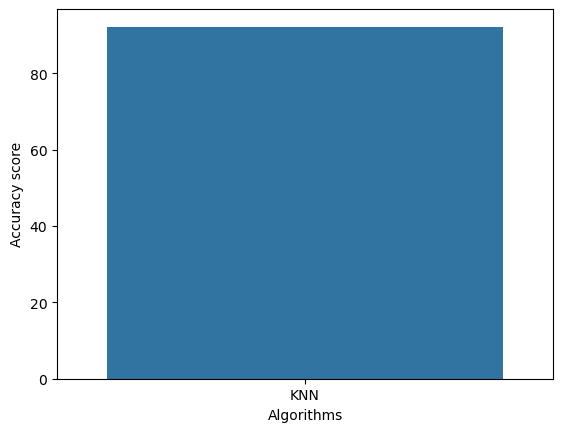

In [9]:
# 'seaborn' package 로 K-Nearest Neighbors' 모델의 정확도 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=['KNN'], y=[score_knn])

## 2+a. 다양한 모델 적용해보기 

#### (2-2) Logistic Regression

In [10]:
# python 'sklearn' package 를 활용하여 'logistic regression' 모델 정의

In [11]:
# 'logistic regression' 모델에 x_train 학습

In [12]:
# 학습한 'logistic regression' 모델에 x_test 테스트

In [13]:
# x_test 결과와 y_test 비교

In [14]:
# 'seaborn' package 로 logistic regression' 모델의 정확도 막대그래프 그리기